In [67]:
# pip install librosa

In [68]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa

In [69]:
path = []
labels = []
for dirname , _ , filenames in os.walk("D:\Recommender systems\\notebook\\TESS Toronto emotional speech set data"):
  for filename in filenames:
    path.append(os.path.join(dirname, filename))
    label = filename.split('_')[-1]
    label = label.split('.')[0]
    labels.append(label.lower())

In [70]:
df = pd.DataFrame()
df['speech'] = path
df['label'] = labels
df.head()

,speech,label
0,D:\Recommender systems\notebook\TESS Toronto e...,angry
1,D:\Recommender systems\notebook\TESS Toronto e...,angry
2,D:\Recommender systems\notebook\TESS Toronto e...,angry
3,D:\Recommender systems\notebook\TESS Toronto e...,angry
4,D:\Recommender systems\notebook\TESS Toronto e...,angry


In [71]:
df.shape

(5600, 2)

In [72]:
df["label"].value_counts()

label
angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='Count'>

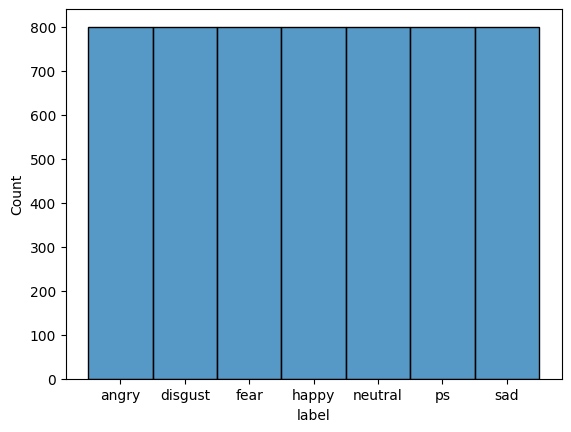

In [87]:
sns.histplot(df["label"])

In [74]:
def extract(filename):
  y , sr  = librosa.load(filename, duration = 3, offset = .5)
  mfcc = np.mean(librosa.feature.mfcc(y = y , sr = sr, n_mfcc = 40), axis = 1)
  return mfcc

In [75]:
a = extract(df['speech'][0])
a

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228361e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27551281e-01,  1.31773758e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126143e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489285e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722581e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996375e+00, -1.82390714e+00,
        4.86896276e+00,  9.31392384e+00,  2.08915019e+00, -1.90649128e+00],
      dtype=float32)

[Text(0.5, 1.0, 'angry')]

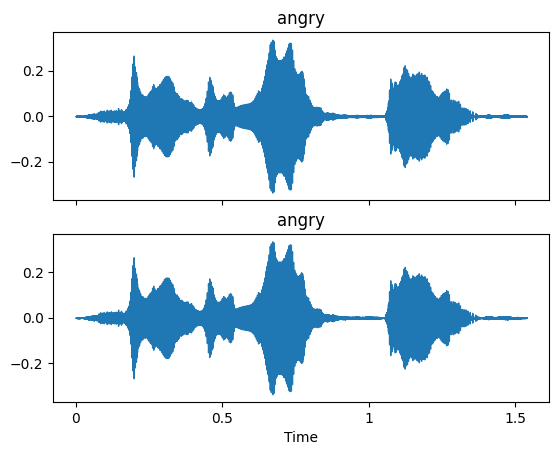

In [76]:
x_1, fs = librosa.load(df['speech'][0])
# And a second version, slightly faster.
x_2, fs = librosa.load(df['speech'][0])
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.waveshow(x_1, sr=fs, ax=ax[0])
ax[0].set(title=df['label'][0])
ax[0].label_outer()

librosa.display.waveshow(x_2, sr=fs, ax=ax[1])
ax[1].set(title=df['label'][0])

In [77]:
a_mfcc = df['speech'].apply(lambda x: extract(x))

In [78]:
a_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.65600896, -32.74544, ...
2       [-429.79196, 46.124, 1.5550478, -0.21709539, 2...
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.8655, 16.092943, 8.04...
                              ...                        
5595    [-406.48053, 80.379875, 32.462395, 46.579094, ...
5596    [-426.90918, 102.54756, 24.800041, 43.04809, 4...
5597    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
5598    [-434.8618, 89.906364, 28.37326, 39.57707, -2....
5599    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 5600, dtype: object

In [79]:
x = [x for x in a_mfcc]
x = np.array(x)
x = np.expand_dims(x, -1)
x.shape

(5600, 40, 1)

In [80]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [81]:
enc.get_feature_names_out()

array(['label_angry', 'label_disgust', 'label_fear', 'label_happy',
       'label_neutral', 'label_ps', 'label_sad'], dtype=object)

In [82]:
y = y.toarray()

In [90]:
from keras.models import Sequential
from keras.layers import Dense, LSTM , Dropout


model = Sequential([

                    LSTM(256, return_sequences= False , input_shape= (40,1) ),
                    Dropout(.2),
                    Dense(128, activation = 'relu'),
                    Dropout(.1),
                    Dense(64, activation = 'relu'),
                    Dropout(.1),
                    Dense(7 , activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
history = model.fit(x, y, validation_split=0.2, epochs=10, batch_size=64)

Epoch 1/10


70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - accuracy: 0.5021 - loss: 1.2749 - val_accuracy: 0.9170 - val_loss: 0.2494
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.9156 - loss: 0.2534 - val_accuracy: 0.9741 - val_loss: 0.0961
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - accuracy: 0.9481 - loss: 0.1571 - val_accuracy: 0.9768 - val_loss: 0.0605
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.9594 - loss: 0.1227 - val_accuracy: 0.9848 - val_loss: 0.0507
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9727 - loss: 0.0765 - val_accuracy: 0.9741 - val_loss: 0.0745
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.9645 - loss: 0.0999 - val_accuracy: 0.9946 - val_loss: 0.0203
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9803 - loss: 0.0616 - val_accuracy: 0.9911 - val_loss: 0.0298
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.9816 - loss: 0.0536 - val_accuracy: 0.9848 - val_los

In [85]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.688839,0.829705,0.916964,0.249376
1,0.924777,0.236285,0.974107,0.096059
2,0.948438,0.150116,0.976786,0.060499
3,0.962723,0.111299,0.984821,0.050737
4,0.971205,0.083659,0.974107,0.074480
5,0.968080,0.091182,0.994643,0.020341
6,0.980804,0.055213,0.991071,0.029821
7,0.977009,0.068738,0.984821,0.049813
8,0.983482,0.049443,0.994643,0.019206
9,0.980134,0.056936,0.992857,0.022357


<Axes: >

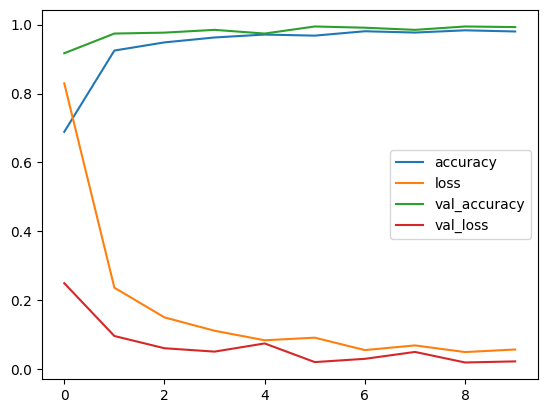

In [86]:
pd.DataFrame(history.history).plot()

In [91]:
model.save("D:\Recommender systems\model\models.h5")